In [31]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('..')
print(sys.path)  # 打印当前工作目录

['/Users/liudongdong/Documents/ddliu代码库/PySoilPhysics/tests', '/opt/anaconda3/envs/ldd22/lib/python39.zip', '/opt/anaconda3/envs/ldd22/lib/python3.9', '/opt/anaconda3/envs/ldd22/lib/python3.9/lib-dynload', '', '/opt/anaconda3/envs/ldd22/lib/python3.9/site-packages', '..', '..', '..', '..']


In [32]:
from PYSOILPHYSICS.utils import SWRC_Data
from PYSOILPHYSICS.SWRC import SWRC_Model1
from PYSOILPHYSICS.SWRC import SWRC_Model2
from PYSOILPHYSICS.SWRC import SWRC_Model3
from PYSOILPHYSICS.SWRC import SWRC_Model4_Silva, SWRC_Model4_Ross
from PYSOILPHYSICS.SWRC import SWRC_Model5

In [33]:
# 从CSV文件中读取数据
file_path = "SWRC_example1.csv"  # 使用相对路径访问swrc文件夹中的文件
df = pd.read_csv(file_path)

# 将DataFrame列转换为numpy数组
pressure_head = df['pressure_head'].values
water_content = df['water_content'].values

# 使用读取的数据创建SWRC_Data对象
data = SWRC_Data(pressure_head, water_content)

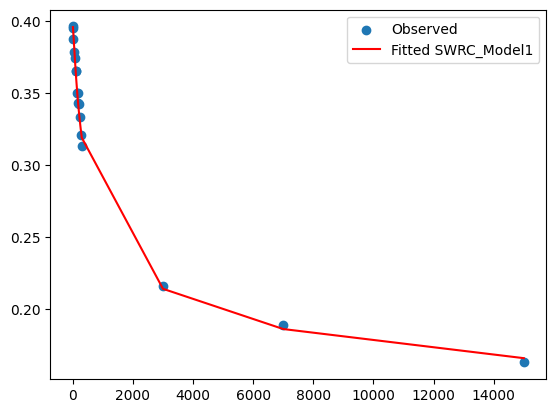

Error Metrics for SWRC_Model1 Model:
MSE: 8.190753312028458e-06, RMSE: 0.002861949215487315, MAE: 0.0024486105102794003, R^2: 0.9982750981128564, NSE: 0.9982750981128564
Model1 fitted parameters: {'theta_R': (0.08121565709874289, 0.02707614794005356), 'theta_S': (0.3962913478734337, 0.002071046894531976), 'alpha': (0.007043434834484943, 0.0007047462044454854), 'n': (1.2815961407722745, 0.049531110220518516)}


In [34]:
# Example for Model1
param_bounds_model1 = {
    'theta_R': (0, 0.6),
    'theta_S': (0, 1),
    'alpha': (0, 2),
    'n': (1, 4)
}
model1 = SWRC_Model1(param_bounds=param_bounds_model1)
fitted_params_model1 = model1.fit(data)
model1.plot(data)
print(f"Model1 fitted parameters: {fitted_params_model1}")

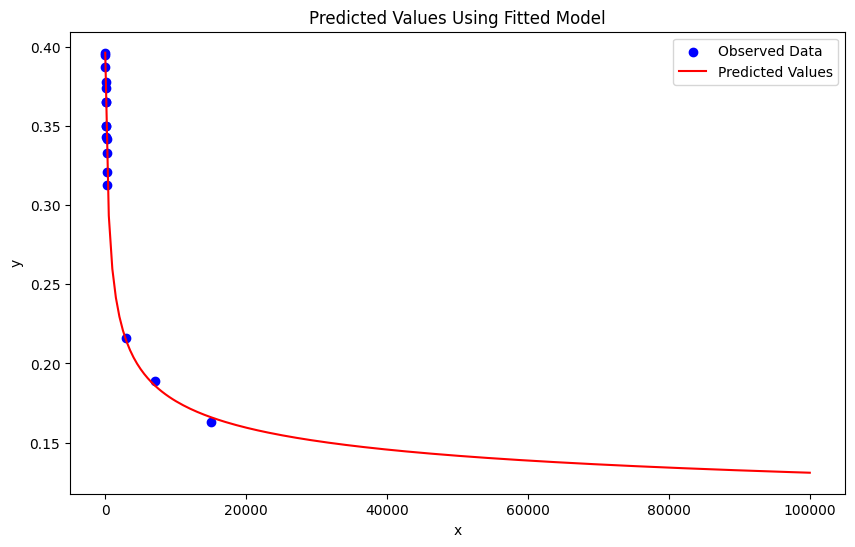

In [35]:
# 使用拟合后的模型进行预测
x_predict = np.linspace(0, 100000, num=200)
y_predict = model1.predict(x_predict)

# 绘制预测结果
plt.figure(figsize=(10, 6))
plt.scatter(data.x, data.y, label="Observed Data", color='blue')
plt.plot(x_predict, y_predict, label="Predicted Values", color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Predicted Values Using Fitted Model")
plt.legend()
plt.show()

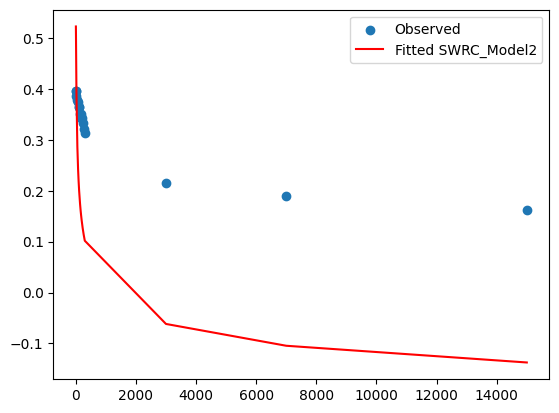

Error Metrics for SWRC_Model2 Model:
MSE: 0.036974265559356935, RMSE: 0.1922869354879757, MAE: 0.17785952205297928, R^2: -6.786460904081212, NSE: -6.786460904081212
Model2 fitted parameters: {'x0': (6.999999999999999, 1.3479756740272275), 'k0': (9.999999999999998, 37.5092999056326), 'k1': (0.9999999999999999, 1.7588583811035357), 'n': (1.4083501624930286, 3.1547665814578396)}


In [36]:
# Example for Model2
param_bounds_model2 = {
    'x0': (6, 7),
    'k0': (0, 10),
    'k1': (0, 1),
    'n': (1, 5)
}
model2 = SWRC_Model2(param_bounds=param_bounds_model2)
fitted_params_model2 = model2.fit(data)
model2.plot(data)
print(f"Model2 fitted parameters: {fitted_params_model2}")

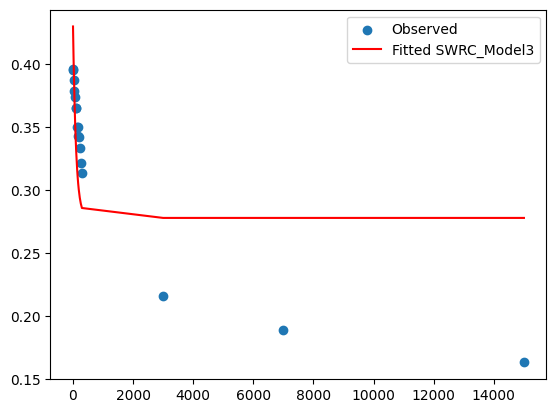

Error Metrics for SWRC_Model3 Model:
MSE: 0.0022918273722824295, RMSE: 0.04787303387380446, MAE: 0.04057808707399157, R^2: 0.5173609546203874, NSE: 0.5173609546203874
Model3 fitted parameters: {'theta_R': (0.2776785604008842, 0.02923931099402994), 'a1': (0.07905616520780266, 7539706.893531742), 'p1': (99.99999999998516, 1035339225.5658152), 'a2': (0.0790119645869379, 7539706.909352293), 'p2': (99.99999999998516, 1035918417.6168653)}


In [37]:
# Example for Model3
param_bounds_model3 = {
    'theta_R': (0, 0.5),
    'a1': (0, 1),
    'p1': (0, 100),
    'a2': (0, 1),
    'p2': (0, 100)
}
model3 = SWRC_Model3(param_bounds=param_bounds_model3)
fitted_params_model3 = model3.fit(data)
model3.plot(data)
print(f"Model3 fitted parameters: {fitted_params_model3}")

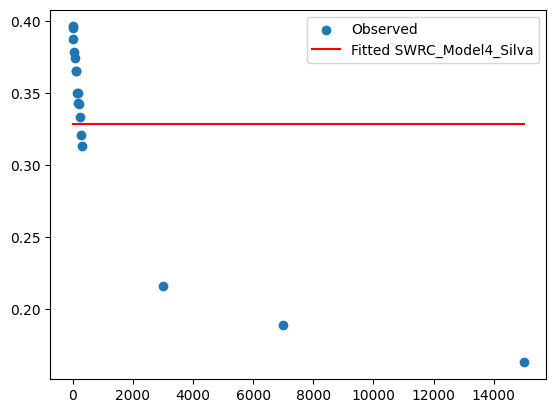

Error Metrics for SWRC_Model4_Silva Model:
MSE: 0.004748532871972418, RMSE: 0.06890959927305061, MAE: 0.05166782010124397, R^2: -2.0872192862952943e-14, NSE: -2.0872192862952943e-14
Model4 Silva fitted parameters: {'Bd': (0.5982455059246726, 0.06479422149142718), 'a': (-2.0087678870822, 0.043322872149504955), 'b': (1.4956122700816472, 0.02591771454333963), 'c': (1.0955285443379683e-15, 0.027997583173844407)}


In [38]:
# Example for Model4 Silva
param_bounds_model4_silva = {
    'Bd': (0, 2),
    'a': (-5, 5),
    'b': (0, 5),
    'c': (0, 5)
}
model4_silva = SWRC_Model4_Silva(param_bounds=param_bounds_model4_silva)
fitted_params_model4_silva = model4_silva.fit(data)
model4_silva.plot(data)
print(f"Model4 Silva fitted parameters: {fitted_params_model4_silva}")

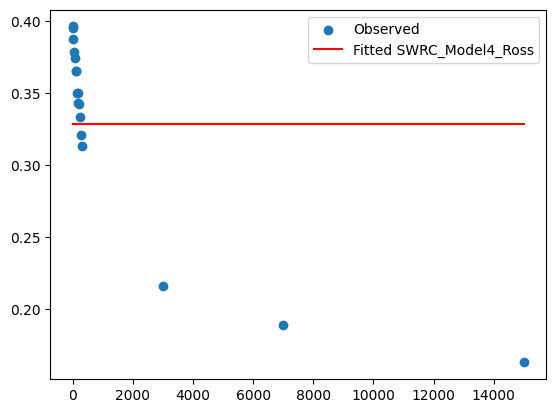

Error Metrics for SWRC_Model4_Ross Model:
MSE: 0.004748532871972319, RMSE: 0.06890959927304989, MAE: 0.05166782007054195, R^2: 0.0, NSE: 0.0
Model4 Ross fitted parameters: {'a': (0.3282352941143981, 0.04758802995206245), 'c': (1.0887060346258861e-17, 0.02606433146441405)}


In [39]:
# Example for Model4 Ross
param_bounds_model4_ross = {
    'a': (0, 1),
    'c': (0, 5)
}
model4_ross = SWRC_Model4_Ross(param_bounds=param_bounds_model4_ross)
fitted_params_model4_ross = model4_ross.fit(data)
model4_ross.plot(data)
print(f"Model4 Ross fitted parameters: {fitted_params_model4_ross}")

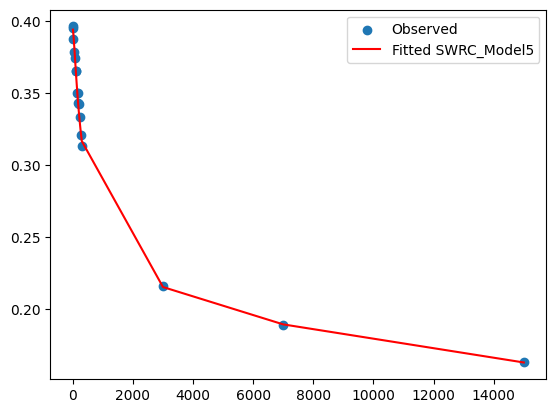

Error Metrics for SWRC_Model5 Model:
MSE: 5.579921616392511e-06, RMSE: 0.002362185770931768, MAE: 0.002053911672300119, R^2: 0.9988249167128384, NSE: 0.9988249167128384
Model5 fitted parameters: {'theta_R': (0.03837956384005608, 0.029177673795314708), 'theta_S': (0.2697082564785002, 0.015118620851271098), 'alpha': (0.006287824776850793, 0.0005537399742933447), 'n': (1.4718126174064836, 0.12943461646280455), 'b0': (0.12442230913996204, 0.014114573658079926), 'b1': (-1.6931434727335238e-06, 4.115957220894006e-06), 'b2': (-6.763486934120844e-12, 1.7697118328297053e-10)}


In [40]:
# Example for Model5
param_bounds_model5 = {
    'theta_R': (0, 0.5),
    'theta_S': (0, 0.5),
    'alpha': (0, 1),
    'n': (1,4),
    'b0': (-1, 1),
    'b1': (-1, 1),
    'b2': (-1, 1)
}
model5 = SWRC_Model5(param_bounds=param_bounds_model5)
fitted_params_model5 = model5.fit(data)
model5.plot(data)
print(f"Model5 fitted parameters: {fitted_params_model5}")